In [1]:
import imutils
import cv2
import numpy as np
# load the input image and show its dimensions, keeping in mind that
# images are represented as a multi-dimensional NumPy array with
# shape no. rows (height) x no. columns (width) x no. channels (depth)
image = cv2.imread("cv_n.jpg")
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))
# display the image to our screen -- we will need to click the window
# open by OpenCV and press a key on our keyboard to continue execution
cv2.imshow("Image", image)
cv2.waitKey(0)

width=600, height=450, depth=3


-1

In [2]:
# access the RGB pixel located at x=50, y=100, keepind in mind that
# OpenCV stores images in BGR order rather than RGB
(B, G, R) = image[100, 50]
print("R={}, G={}, B={}".format(R, G, B))

R=24, G=51, B=40


In [4]:
# extract a 100x100 pixel square ROI (Region of Interest) from the
# input image starting at x=320,y=60 at ending at x=420,y=160
roi = image[60:160, 320:420]
cv2.imshow("ROI", roi)
cv2.waitKey(0)

-1

In [5]:
# resize the image to 200x200px, ignoring aspect ratio
resized = cv2.resize(image, (200, 200))
cv2.imshow("Fixed Resizing", resized)
cv2.waitKey(0)

-1

In [6]:
# fixed resizing and distort aspect ratio so let's resize the width
# to be 300px but compute the new height based on the aspect ratio
r = 300.0 / w
dim = (300, int(h * r))
resized = cv2.resize(image, dim)
cv2.imshow("Aspect Ratio Resize", resized)
cv2.waitKey(0)

-1

In [7]:
# manually computing the aspect ratio can be a pain so let's use the
# imutils library instead
resized = imutils.resize(image, width=300)
cv2.imshow("Imutils Resize", resized)
cv2.waitKey(0)

-1

In [7]:
# let's rotate an image 45 degrees clockwise using OpenCV by first
# computing the image center, then constructing the rotation matrix,
# and then finally applying the affine warp
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
cv2.imshow("OpenCV Rotation", rotated)
cv2.waitKey(0)

-1

In [3]:
# rotation can also be easily accomplished via imutils with less code
rotated = imutils.rotate(image, -45)
cv2.imshow("Imutils Rotation", rotated)
cv2.waitKey(0)

-1

In [6]:
# OpenCV doesn't "care" if our rotated image is clipped after rotation
# so we can instead use another imutils convenience function to help
# us out
rotated = imutils.rotate_bound(image, 45)
cv2.imshow("Imutils Bound Rotation", rotated)
cv2.waitKey(0)

-1

In [10]:
# apply a Gaussian blur with a 11x11 kernel to the image to smooth it,
# useful when reducing high frequency noise
#Larger kernels would yield a more blurry image. Smaller kernels will create less blurry images. 
blurred = cv2.GaussianBlur(image, (11, 11), 0)
cv2.imshow("Blurred", blurred)
cv2.waitKey(0)

-1

In [13]:
# draw a 2px thick red rectangle surrounding the face
output = image.copy()
cv2.rectangle(output, (320, 60), (420, 160), (0, 0, 255), 20)
cv2.imshow("Rectangle", output)
cv2.waitKey(0)

-1

In [17]:
# draw a blue 20px (filled in) circle on the image centered at
# x=300,y=150
output = image.copy()
cv2.circle(output, (300, 150), 20, (255, 0, 0), -1) #-1,0,1
cv2.imshow("Circle", output)
cv2.waitKey(0)

-1

In [18]:
# draw a 5px thick red line from x=60,y=20 to x=400,y=200
output = image.copy()
cv2.line(output, (60, 20), (400, 200), (0, 0, 255), 2)
cv2.imshow("Line", output)
cv2.waitKey(0)

-1

In [23]:
# draw green text on the image
output = image.copy()
cv2.putText(output, "OpenCV + Jurassic Park!!!", (10, 25), 
	cv2.FONT_HERSHEY_SIMPLEX,0.5, (0, 255, 0), 2) #0.7 Font size multiplier,2 thickness
cv2.imshow("Text", output)
cv2.waitKey(0)

-1

## Counting objects ##

In [35]:
#image = cv2.imread("tertis.jpg")
image = cv2.imread("coin.jpg")
cv2.imshow("Tertis", image)
cv2.waitKey(0)

-1

In [36]:
# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray", gray)
cv2.waitKey(0)

-1

In [27]:
# applying edge detection we can find the outlines of objects in
# images
edged = cv2.Canny(gray, 30, 150)
cv2.imshow("Edged", edged)
cv2.waitKey(0)

-1

In [37]:
# threshold the image by setting all pixel values less than 225
# to 255 (white; foreground) and all pixel values >= 225 to 255
# (black; background), thereby segmenting the image
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
cv2.imshow("Thresh", thresh)
cv2.waitKey(0)

-1

In [48]:
# find contours (i.e., outlines) of the foreground objects in the
# thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
#print((cnts))
output = image.copy()
# loop over the contours
for c in cnts:
	# draw each contour on the output image with a 3px thick purple
	# outline, then display the output contours one at a time
	cv2.drawContours(output, [c], -1, (240, 0, 159), 1)



In [49]:
# draw the total number of contours found in purple
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(240, 0, 159), 2)
cv2.imshow("Contours", output)
cv2.waitKey(0)

-1

# counting coin #

In [40]:
image = cv2.imread("coin.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray", gray)
cv2.waitKey(0)

-1

In [41]:
gray_blur=cv2.GaussianBlur(gray,(11,11),0)
thresh = cv2.threshold(gray_blur, 225, 255, cv2.THRESH_BINARY_INV)[1]
result_img=thresh.copy()
cv2.imshow("result_img", result_img)
cv2.waitKey(0)

-1

In [42]:
contours,hierachy=cv2.findContours(result_img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
output = image.copy()
print(len(contours))
# loop over the contours
for c in contours:
	# draw each contour on the output image with a 3px thick purple
	# outline, then display the output contours one at a time
	cv2.drawContours(output, [c], -1, (240, 0, 159), 1)

8


In [43]:
text = "I found {} objects!".format(len(contours))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(240, 0, 159), 2)
cv2.imshow("Contours", output)
cv2.waitKey(0)

-1

# Image augmentation

In [3]:
import cv2
import os
import numpy as np

# Function to perform data augmentation on a single image
def augment_image(image):
    augmented_images = []
    
    # Original image (no transformation)
    augmented_images.append(image)

    # Flip horizontally
    flipped_image = cv2.flip(image, 1)
    augmented_images.append(flipped_image)

    # Rotation
    rows, cols, _ = image.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), 30, 1) # Rotate by 30 degrees
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    augmented_images.append(rotated_image)

    # Brightness adjustment
    brightened_image = cv2.convertScaleAbs(image, alpha=1.5, beta=0) # Increase brightness by 50%
    augmented_images.append(brightened_image)

    # Gaussian blur
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0) # Apply Gaussian blur with kernel size 5x5
    augmented_images.append(blurred_image)

    return augmented_images

# Path to directory containing face images
input_dir = "images"
# Path to directory to save augmented images
output_dir = "augmented_images"

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Process each image in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Read the image
        image = cv2.imread(os.path.join(input_dir, filename))

        # Perform data augmentation
        augmented_images = augment_image(image)

        # Save augmented images
        for i, augmented_image in enumerate(augmented_images):
            output_filename = f"{os.path.splitext(filename)[0]}_augmented_{i}.jpg"
            cv2.imwrite(os.path.join(output_dir, output_filename), augmented_image)


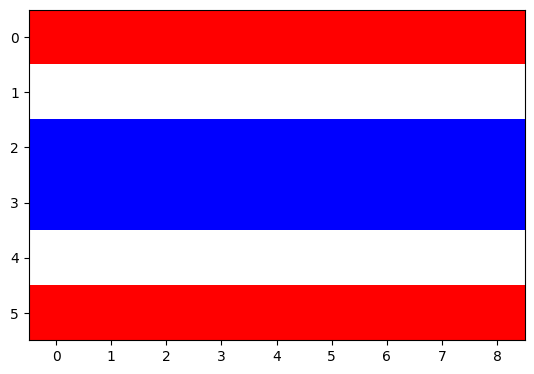

In [11]:
import numpy as np
import matplotlib.pyplot as plt
t = np.ones((6, 9, 3))
t[[0,-1],:,1:] = 0
t[2:4,:,:2] = 0
# Display the array as an image
plt.imshow(t)
plt.show()